Data Analysis Conclusion:
- protein sizes are not normally distributed
- complex size are not normally distributed
- deltaG is approximately normally distributed
- deltaG has low correlation with any of the parameter (any B-factor, counts of H-bond, polar aa, charged aa)
    - highest correlation is with interface B-factor

In [5]:
# Cell 1: Imports and configuration
import sys, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from IPython.display import Markdown, display

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
print(project_root)
if project_root not in sys.path:
    sys.path.insert(0, project_root)
from src.utils.visualizations import plot_tsne_embeddings

# Ensure inline plotting
%matplotlib inline


/vast/palmer/home.mccleary/as4272/protein_design/topology/mGLI-PP


In [21]:
# Cell 2: User parameters
# — set your file path here (e.g. 'data/complex_counts.tsv')
input_file = '/home/op98/protein_design/topology/mGLI-PP/complex_size.tsv'

# Optional: number of bins and output figure filename
bins = 50
output_figure = 'distribution_curve.png'

# Display chosen parameters
display(Markdown(f"**Input file:** `{input_file}`  \n"
                 f"**Histogram bins:** {bins}  \n"
                 f"**Output figure name:** `{output_figure}`"))


**Input file:** `/home/op98/protein_design/topology/mGLI-PP/complex_size.tsv`  
**Histogram bins:** 50  
**Output figure name:** `distribution_curve.png`

In [22]:
df = pd.read_csv(input_file, sep='\t')  # ← make sure input_file is set!
counts = df['Complex_Count']

# Show first rows
display(df.head())

# Compute statistics
mu = counts.mean()
median = counts.median()
sigma = counts.std(ddof=0)

# Display stats
display(Markdown(f"**Mean (μ):** {mu:.2f}  \n"
                 f"**Median:** {median:.2f}  \n"
                 f"**Standard Deviation (σ):** {sigma:.2f}"))



,PDB_ID,Complex_Count
0,1fc2,251
1,3sgb,235
2,2tgp,281
3,2ptc,281
4,2sni,339


**Mean (μ):** 812.11  
**Median:** 585.00  
**Standard Deviation (σ):** 833.47

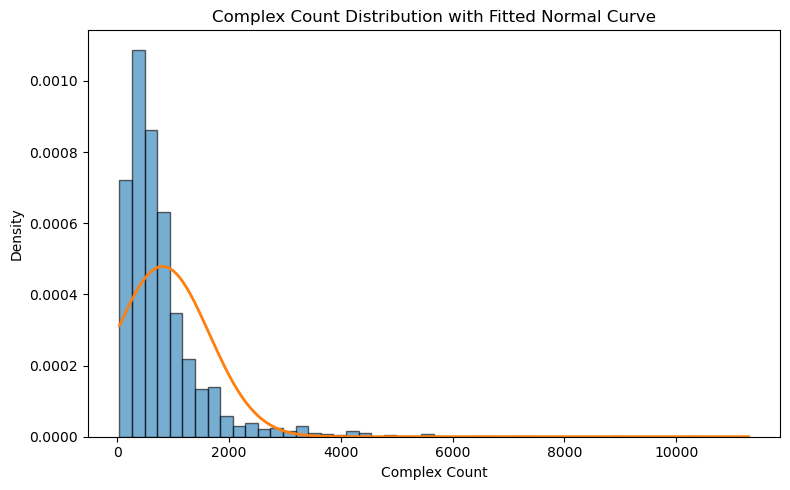

In [23]:
# Cell 4: Plot histogram + fitted normal curve
plt.figure(figsize=(8, 5))
plt.hist(counts, bins=bins, density=True, alpha=0.6, edgecolor='k')

xmin, xmax = counts.min(), counts.max()
x = np.linspace(xmin, xmax, 200)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, lw=2)

plt.title('Complex Count Distribution with Fitted Normal Curve')
plt.xlabel('Complex Count')
plt.ylabel('Density')
plt.tight_layout()
plt.show()


In [24]:
# Cell 5: Save figure
plt.savefig(output_figure, dpi=300)
display(Markdown(f"Figure saved as **{output_figure}**"))


Figure saved as **distribution_curve.png**

<Figure size 640x480 with 0 Axes>

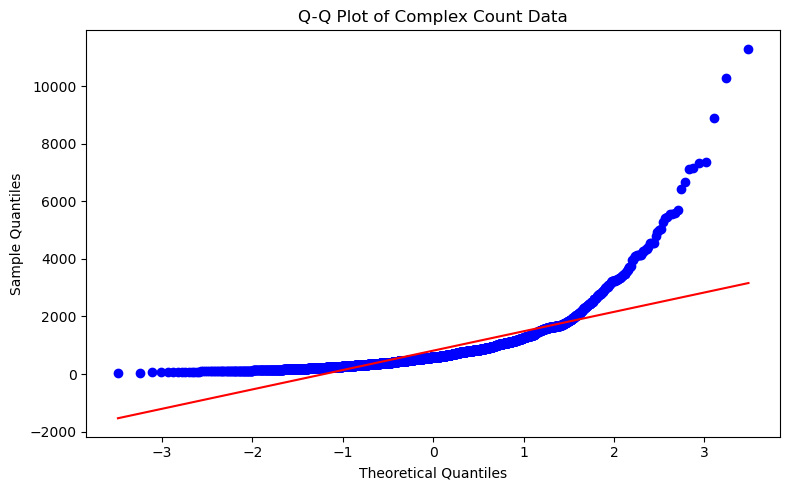

In [26]:
# Cell 5: Q-Q Plot for Normality Check
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
stats.probplot(counts, dist="norm", plot=plt)
plt.title('Q-Q Plot of Complex Count Data')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.tight_layout()
plt.show()


In [16]:
# Cell 1: Imports & configuration
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from IPython.display import Markdown, display

# inline plotting
%matplotlib inline


In [17]:
# Cell 2: User parameters
input_file = '/home/op98/protein_design/topology/mGLI-PP/protein_size.tsv'   # ← update this!
bins       = 50                            # histogram bins

display(Markdown(f"**Input file:** `{input_file}`  \n"
                 f"**Bins:** {bins}"))


**Input file:** `/home/op98/protein_design/topology/mGLI-PP/protein_size.tsv`  
**Bins:** 50

In [18]:
# Cell 3: Load data & compute Total_Count
df = pd.read_csv(input_file, sep='\t')

# Identify all Prot*_Count columns
count_cols = [c for c in df.columns if c.endswith('_Count')]

# Sum across them
df['Total_Count'] = df[count_cols].sum(axis=1)

# Show a preview including the new column
display(df[['PDB_ID'] + count_cols + ['Total_Count']].head())


,PDB_ID,Prot1_Count,Prot2_Count,Prot3_Count,Prot4_Count,Prot5_Count,Prot6_Count,Prot7_Count,Prot8_Count,Prot9_Count,Prot10_Count,Prot11_Count,Prot12_Count,Prot13_Count,Prot14_Count,Prot15_Count,Prot16_Count,Total_Count
0,1fc2,44,207,0,0,0,0,0,0,0,0,0,0,0,0,0,0,251
1,3sgb,185,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,235
2,2tgp,223,58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,281
3,2ptc,223,58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,281
4,2sni,275,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,339


In [19]:
total = df['Total_Count']
mu = total.mean()
median = total.median()
sigma = total.std(ddof=0)

# Display the results in Markdown

display(Markdown(f"**Total_Count** Distribution  \n"
                 f"- Mean (μ): **{mu:.2f}**  \n"
                 f"- Median: **{median:.2f}**  \n"
                 f"- Std Dev (σ): **{sigma:.2f}**"))


**Total_Count** Distribution  
- Mean (μ): **812.11**  
- Median: **585.00**  
- Std Dev (σ): **833.47**

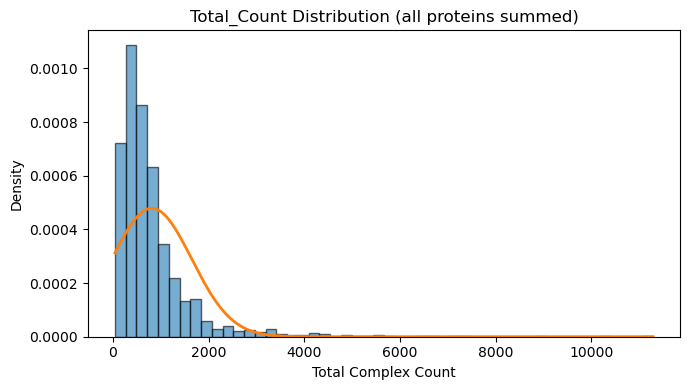

In [17]:
# Cell 5: Plot histogram + fitted normal curve for Total_Count
plt.figure(figsize=(7,4))
plt.hist(total, bins=bins, density=True, alpha=0.6, edgecolor='k')

x = np.linspace(total.min(), total.max(), 200)
plt.plot(x, norm.pdf(x, mu, sigma), lw=2)

plt.title('Total_Count Distribution (all proteins summed)')
plt.xlabel('Total Complex Count')
plt.ylabel('Density')
plt.tight_layout()
plt.show()


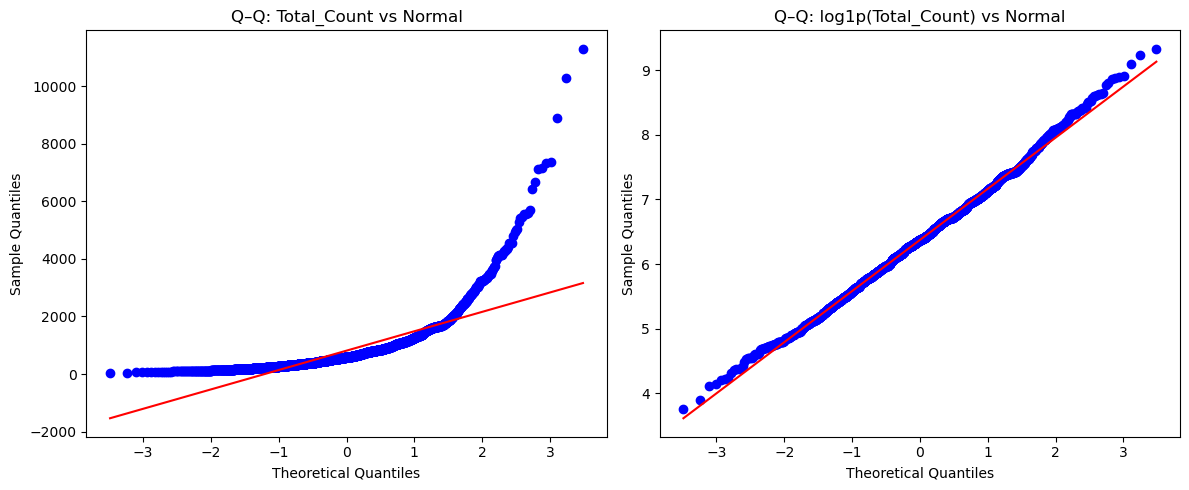

In [18]:
# Cell 6: Q–Q plots for Total_Count (raw) and log‐transformed

from scipy.stats import probplot

# extract the Total_Count series
total = df['Total_Count']

# compute log‐transformed counts (add 1 to avoid log(0))
log_total = np.log1p(total)

# set up side‐by‐side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Q–Q for raw data
probplot(total, dist="norm", plot=axes[0])
axes[0].set_title("Q–Q: Total_Count vs Normal")
axes[0].set_xlabel("Theoretical Quantiles")
axes[0].set_ylabel("Sample Quantiles")

# Q–Q for log‐transformed data
probplot(log_total, dist="norm", plot=axes[1])
axes[1].set_title("Q–Q: log1p(Total_Count) vs Normal")
axes[1].set_xlabel("Theoretical Quantiles")
axes[1].set_ylabel("Sample Quantiles")

plt.tight_layout()
plt.show()


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, linregress
import seaborn as sns

In [6]:
df = pd.read_csv('/home/op98/protein_design/topology/mGLI-PP/binding_afinity.tsv', sep='\t')
df.head()

,PDB_ID,ΔG_kJ/mol,Avg_Bfactor_Total,Avg_Bfactor_Interface
0,1fc2,-43.65,28.67,30.90
1,3sgb,-61.34,14.02,10.53
2,2tgp,-32.08,17.10,15.16
3,2ptc,-75.47,24.28,20.35
4,2sni,-66.77,12.83,10.02


In [7]:
# Cell 3: Drop any row where ΔG, Avg_Bfactor_Total or Avg_Bfactor_Interface is zero
cols = ['ΔG_kJ/mol', 'Avg_Bfactor_Total', 'Avg_Bfactor_Interface']
df = df[(df[cols] != 0).all(axis=1)]
print(f"Dropped zeros – now {len(df)} rows remain")


Dropped zeros – now 2679 rows remain


In [8]:
# Cell 4: Pearson & Spearman correlations
pairs = [
    ('ΔG_kJ/mol', 'Avg_Bfactor_Total'),
    ('ΔG_kJ/mol', 'Avg_Bfactor_Interface'),
    ('Avg_Bfactor_Total', 'Avg_Bfactor_Interface'),
]

for x, y in pairs:
    pr, pp = pearsonr(df[x], df[y])
    sr, sp = spearmanr(df[x], df[y])
    print(f"{x} vs {y}:")
    print(f"  • Pearson r = {pr:.3f} (p = {pp:.3f})")
    print(f"  • Spearman ρ = {sr:.3f} (p = {sp:.3f})\n")

ΔG_kJ/mol vs Avg_Bfactor_Total:
  • Pearson r = 0.029 (p = 0.138)
  • Spearman ρ = 0.027 (p = 0.167)

ΔG_kJ/mol vs Avg_Bfactor_Interface:
  • Pearson r = 0.046 (p = 0.016)
  • Spearman ρ = 0.050 (p = 0.009)

Avg_Bfactor_Total vs Avg_Bfactor_Interface:
  • Pearson r = 0.969 (p = 0.000)
  • Spearman ρ = 0.969 (p = 0.000)



In [9]:
# Cell 5: Linear regression with scipy.linregress
for x, y in pairs:
    res = linregress(df[x], df[y])
    print(f"Regression of {y} on {x}:")
    print(f"  • slope = {res.slope:.3f}")
    print(f"  • intercept = {res.intercept:.3f}")
    print(f"  • R² = {res.rvalue**2:.3f}")
    print(f"  • p-value = {res.pvalue:.3f}")
    print(f"  • stderr = {res.stderr:.3f}\n")

Regression of Avg_Bfactor_Total on ΔG_kJ/mol:
  • slope = 0.098
  • intercept = 56.237
  • R² = 0.001
  • p-value = 0.138
  • stderr = 0.066

Regression of Avg_Bfactor_Interface on ΔG_kJ/mol:
  • slope = 0.160
  • intercept = 54.714
  • R² = 0.002
  • p-value = 0.016
  • stderr = 0.067

Regression of Avg_Bfactor_Interface on Avg_Bfactor_Total:
  • slope = 0.985
  • intercept = -3.364
  • R² = 0.938
  • p-value = 0.000
  • stderr = 0.005



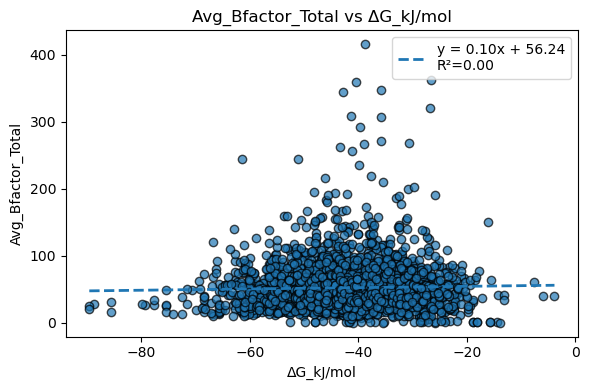

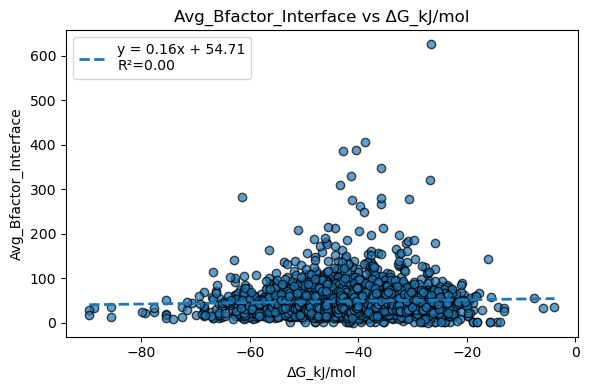

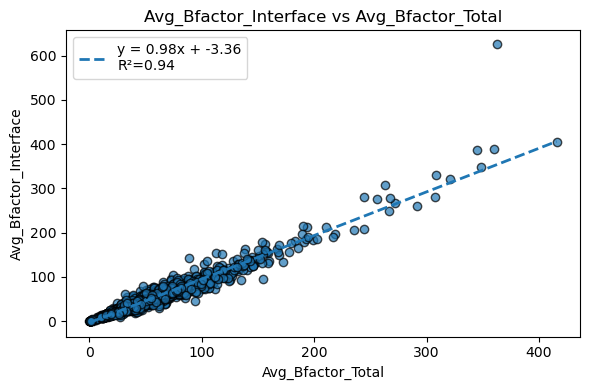

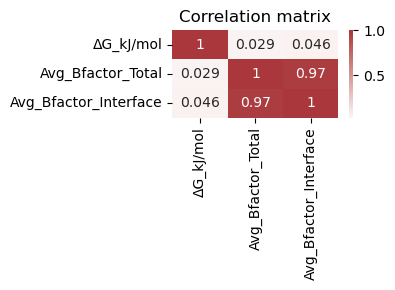

In [10]:
# Cell 6: Scatter plots with fitted lines
def scatter_with_fit(x, y):
    plt.figure(figsize=(6,4))
    plt.scatter(df[x], df[y], edgecolor='k', alpha=0.7)
    res = linregress(df[x], df[y])
    line_x = np.array([df[x].min(), df[x].max()])
    line_y = res.intercept + res.slope*line_x
    plt.plot(line_x, line_y, '--', lw=2,
             label=f"y = {res.slope:.2f}x + {res.intercept:.2f}\nR²={res.rvalue**2:.2f}")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f"{y} vs {x}")
    plt.legend()
    plt.tight_layout()
    plt.show()

for x, y in pairs:
    scatter_with_fit(x, y)

# Cell 7: Correlation heatmap
corr = df[['ΔG_kJ/mol', 'Avg_Bfactor_Total', 'Avg_Bfactor_Interface']].corr()
plt.figure(figsize=(4,3))
sns.heatmap(corr, annot=True, center=0, cmap='vlag')
plt.title("Correlation matrix")
plt.tight_layout()
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from itertools import combinations

In [2]:
df = pd.read_csv('/home/op98/protein_design/topology/mGLI-PP/binding_afinity_extended.tsv', sep='\t')
df.head()

,PDB_ID,ΔG_kJ/mol,Avg_Bfactor_Total,Avg_Bfactor_Interface,Charged_Count,Polar_Count,Hbond_Count
0,1fc2,-43.65,28.67,30.90,8,17,6
1,3sgb,-61.34,14.02,10.53,9,14,7
2,2tgp,-32.08,17.10,15.16,8,15,11
3,2ptc,-75.47,24.28,20.35,9,15,11
4,2sni,-66.77,12.83,10.02,9,16,10


In [3]:
cols = [
    'ΔG_kJ/mol',
    'Avg_Bfactor_Total',
    'Avg_Bfactor_Interface',
    'Charged_Count',
    'Polar_Count',
    'Hbond_Count'
]
data = df[cols]

In [4]:
data = data[(data != 0).all(axis=1)]

In [5]:
data.describe()

,ΔG_kJ/mol,Avg_Bfactor_Total,Avg_Bfactor_Interface,Charged_Count,Polar_Count,Hbond_Count
count,2676.000000,2676.000000,2676.000000,2676.000000,2676.000000,2676.000000
mean,-41.680916,52.205818,48.057268,47.829223,60.126682,51.463752
std,10.610025,36.117042,36.726257,63.174380,78.034567,81.363455
min,-89.600000,0.010000,0.010000,1.000000,1.000000,1.000000
25%,-48.650000,30.355000,26.677500,17.000000,18.000000,13.000000
50%,-41.500000,44.775000,40.320000,30.000000,34.000000,28.000000
75%,-33.790000,64.312500,60.082500,56.000000,71.000000,55.000000
max,-3.850000,415.760000,625.710000,942.000000,1281.000000,1519.000000


In [6]:
pearson_corr = data.corr(method='pearson')
spearman_corr = data.corr(method='spearman')

print("Pearson correlation matrix:")
print(pearson_corr, "\n")
print("Spearman correlation matrix:")
print(spearman_corr, "\n")

Pearson correlation matrix:
                       ΔG_kJ/mol  Avg_Bfactor_Total  Avg_Bfactor_Interface  \
ΔG_kJ/mol               1.000000           0.029818               0.047504   
Avg_Bfactor_Total       0.029818           1.000000               0.968690   
Avg_Bfactor_Interface   0.047504           0.968690               1.000000   
Charged_Count           0.018286           0.266821               0.247273   
Polar_Count            -0.043850           0.223954               0.191537   
Hbond_Count             0.021317           0.182714               0.156181   

                       Charged_Count  Polar_Count  Hbond_Count  
ΔG_kJ/mol                   0.018286    -0.043850     0.021317  
Avg_Bfactor_Total           0.266821     0.223954     0.182714  
Avg_Bfactor_Interface       0.247273     0.191537     0.156181  
Charged_Count               1.000000     0.894296     0.880733  
Polar_Count                 0.894296     1.000000     0.892621  
Hbond_Count                 0.88073

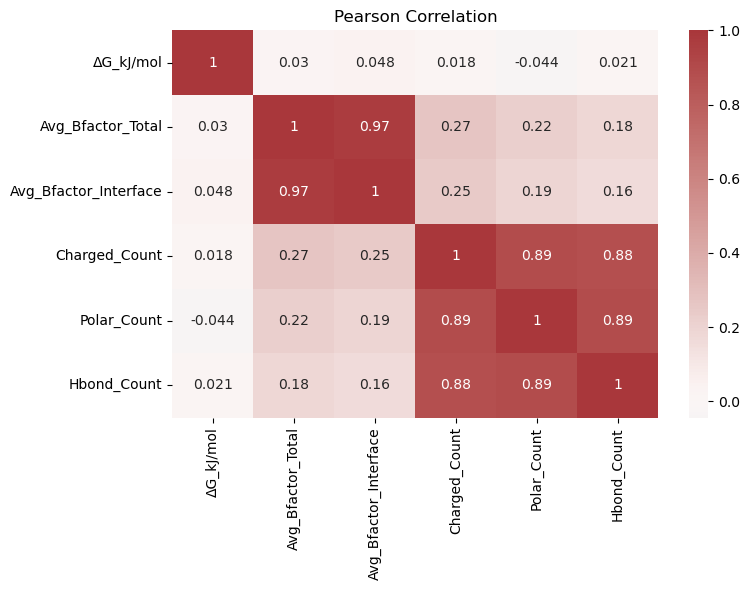

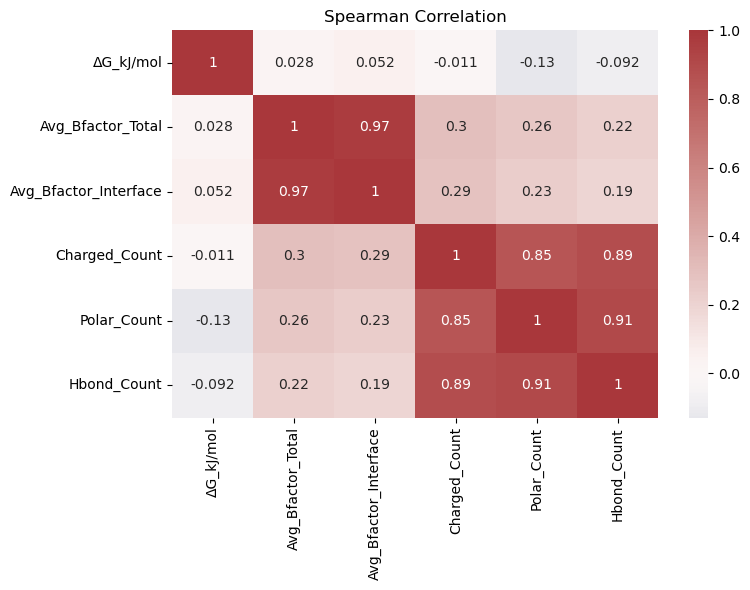

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(pearson_corr, annot=True, center=0, cmap='vlag')
plt.title('Pearson Correlation')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(spearman_corr, annot=True, center=0, cmap='vlag')
plt.title('Spearman Correlation')
plt.tight_layout()
plt.show()


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, probplot

In [9]:
file_path = '/home/op98/protein_design/topology/mGLI-PP/binding_afinity.tsv'  # ← change to the actual TSV file path
df = pd.read_csv(file_path, sep='\t')

In [10]:
dg = df['ΔG_kJ/mol']

In [11]:
mu = dg.mean()
sigma = dg.std(ddof=0) 

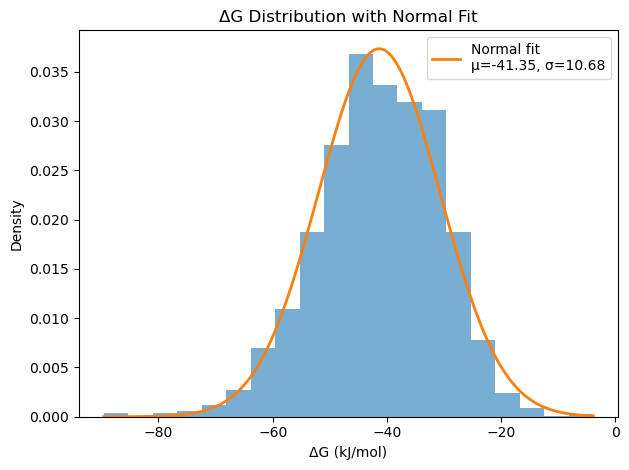

In [12]:
plt.figure()
counts, bins, _ = plt.hist(dg, bins=20, density=True, alpha=0.6)
x = np.linspace(bins.min(), bins.max(), 200)
plt.plot(x, norm.pdf(x, mu, sigma), linewidth=2,
         label=f'Normal fit\nμ={mu:.2f}, σ={sigma:.2f}')
plt.xlabel('ΔG (kJ/mol)')
plt.ylabel('Density')
plt.title('ΔG Distribution with Normal Fit')
plt.legend()
plt.tight_layout()
plt.show()

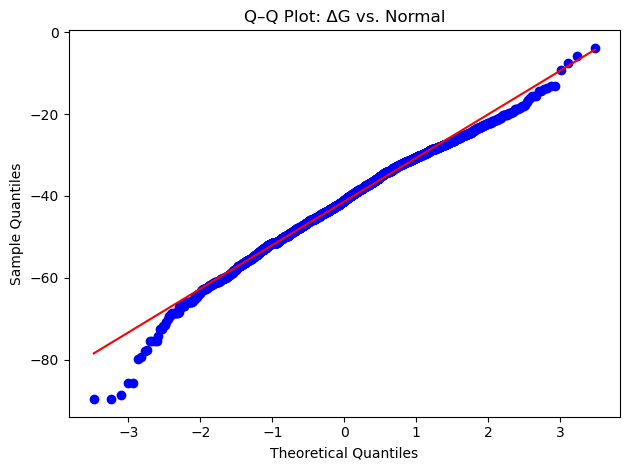

In [13]:
plt.figure()
probplot(dg, dist="norm", plot=plt)
plt.title('Q–Q Plot: ΔG vs. Normal')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.tight_layout()
plt.show()

In [14]:
median = dg.median()

# 4c) Print mean, median, and standard deviation
print(f"Mean ΔG: {mu:.2f} kJ/mol")
print(f"Median ΔG: {median:.2f} kJ/mol")
print(f"Std Dev ΔG: {sigma:.2f} kJ/mol")

Mean ΔG: -41.35 kJ/mol
Median ΔG: -41.10 kJ/mol
Std Dev ΔG: 10.68 kJ/mol


In [6]:
plot_tsne_embeddings(
    emb_dir=project_root+"/src/features/mGLI",
    labels_tsv=project_root+"/src/data/data_files/binding_affinity.tsv",
    output_png=project_root+"/results/images/tsne_affinity.png"
)

/vast/palmer/home.mccleary/as4272/protein_design/topology/mGLI-PP/src/utils/visualizations.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  emb = torch.load(path)


ValueError: Input X contains NaN.
TSNE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

1fc2: shape=torch.Size([1440]), flat_shape=(1440,), has_nan=False, has_inf=False, min=0.000, max=10.264
3sgb: shape=torch.Size([1440]), flat_shape=(1440,), has_nan=False, has_inf=False, min=0.000, max=7.232
2tgp: shape=torch.Size([1440]), flat_shape=(1440,), has_nan=False, has_inf=False, min=0.000, max=5.834
2ptc: shape=torch.Size([1440]), flat_shape=(1440,), has_nan=False, has_inf=False, min=0.000, max=4.889
2sni: shape=torch.Size([1440]), flat_shape=(1440,), has_nan=False, has_inf=False, min=0.000, max=6.977


/tmp/ipykernel_2094725/20291525.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  emb = torch.load(path)


In [3]:
# Cell 1: Setup & imports
%matplotlib inline
import os
import torch
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


In [4]:
# Cell 2: Parameters
emb_dir      = "/home/as4272/protein_design/topology/mGLI-PP/src/features/mGLI"
labels_tsv   = "/home/op98/protein_design/topology/mGLI-PP/src/data/data_files/binding_affinity.tsv"
perplexity   = 30
n_components = 2

In [5]:
# Cell 3: Load ΔG labels
df = pd.read_csv(labels_tsv, sep="\t")
df["PDB_ID"] = df["PDB_ID"].astype(str)
print(f"Loaded {len(df)} ΔG entries, e.g.:")
df.head()


Loaded 2799 ΔG entries, e.g.:


,PDB_ID,ΔG_kJ/mol,Avg_Bfactor_Total,Avg_Bfactor_Interface
0,1fc2,-43.65,28.67,30.90
1,3sgb,-61.34,14.02,10.53
2,2tgp,-32.08,17.10,15.16
3,2ptc,-75.47,24.28,20.35
4,2sni,-66.77,12.83,10.02


In [6]:
# Cell 4: Load & filter embeddings
pdbs       = df["PDB_ID"].tolist()
affinities = df["ΔG_kJ/mol"].values

emb_list   = []
aff_list   = []
missing    = []
bad_finite = []

for pdb, dg in zip(pdbs, affinities):
    path = os.path.join(emb_dir, f"{pdb}_mGLI.pt")
    if not os.path.isfile(path):
        missing.append(pdb)
        continue
    emb = torch.load(path)
    emb_flat = emb.flatten().numpy()
    if not np.isfinite(emb_flat).all():
        bad_finite.append(pdb)
        continue
    emb_list.append(emb_flat)
    aff_list.append(dg)

print(f"→ {len(emb_list)}/{len(pdbs)} embeddings loaded")
if missing:
    print(f"Missing files for: {missing}")
if bad_finite:
    print(f"Non-finite values in: {bad_finite}")


/tmp/ipykernel_2168788/3184602808.py:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  emb = torch.load(path)


→ 2798/2799 embeddings loaded
Non-finite values in: ['4iyp']


In [7]:
# Cell 5: Stack & run t-SNE
X = np.vstack(emb_list)
y = np.array(aff_list)

tsne = TSNE(
    n_components=n_components,
    perplexity=min(perplexity, max(1, len(X)//4)),
    init="pca",
    learning_rate="auto",
    random_state=42
)
X_emb = tsne.fit_transform(X)
print("t-SNE embedding shape:", X_emb.shape)


t-SNE embedding shape: (2798, 2)


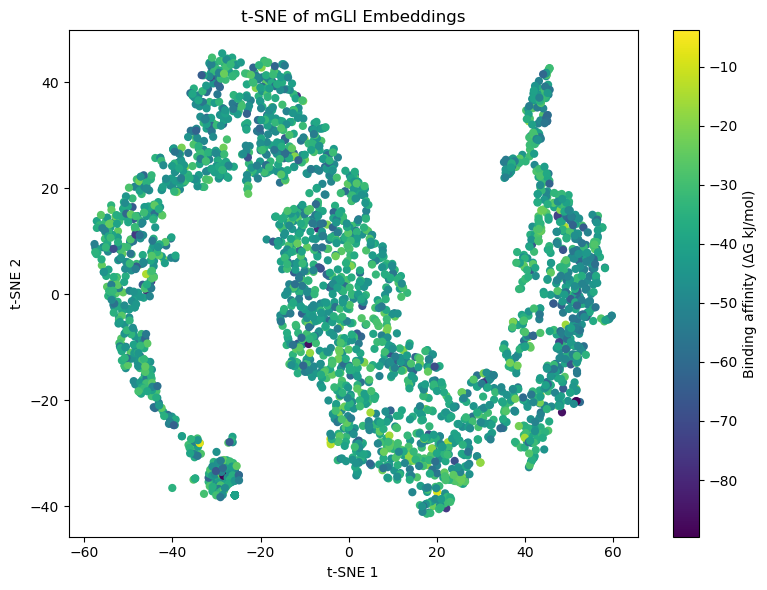

In [8]:
# Cell 6: Display the plot
plt.figure(figsize=(8,6))
sc = plt.scatter(
    X_emb[:,0], X_emb[:,1],
    c=y, cmap="viridis", s=35, edgecolors="none"
)
cbar = plt.colorbar(sc)
cbar.set_label("Binding affinity (ΔG kJ/mol)")
plt.title("t-SNE of mGLI Embeddings")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.tight_layout()
plt.show()


In [9]:
# Cell 2: Parameters
emb_dir      = "/home/as4272/protein_design/topology/mGLI-PP/src/features/mGLI"
labels_tsv   = "/home/op98/protein_design/topology/mGLI-PP/src/data/data_files/binding_affinity_two_proteins.tsv"
perplexity   = 30
n_components = 2

In [10]:
# Cell 3: Load ΔG labels
df = pd.read_csv(labels_tsv, sep="\t")
df["PDB_ID"] = df["PDB_ID"].astype(str)
print(f"Loaded {len(df)} ΔG entries, e.g.:")
df.head()

Loaded 1831 ΔG entries, e.g.:


,PDB_ID,ΔG_kJ/mol,Avg_Bfactor_Total,Avg_Bfactor_Interface
0,1fc2,-43.65,28.67,30.90
1,3sgb,-61.34,14.02,10.53
2,2tgp,-32.08,17.10,15.16
3,2ptc,-75.47,24.28,20.35
4,2sni,-66.77,12.83,10.02


In [11]:
# Cell 4: Load & filter embeddings
pdbs       = df["PDB_ID"].tolist()
affinities = df["ΔG_kJ/mol"].values

emb_list   = []
aff_list   = []
missing    = []
bad_finite = []

for pdb, dg in zip(pdbs, affinities):
    path = os.path.join(emb_dir, f"{pdb}_mGLI.pt")
    if not os.path.isfile(path):
        missing.append(pdb)
        continue
    emb = torch.load(path)
    emb_flat = emb.flatten().numpy()
    if not np.isfinite(emb_flat).all():
        bad_finite.append(pdb)
        continue
    emb_list.append(emb_flat)
    aff_list.append(dg)

print(f"→ {len(emb_list)}/{len(pdbs)} embeddings loaded")
if missing:
    print(f"Missing files for: {missing}")
if bad_finite:
    print(f"Non-finite values in: {bad_finite}")

/tmp/ipykernel_2168788/2236291382.py:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  emb = torch.load(path)


→ 1830/1831 embeddings loaded
Non-finite values in: ['4iyp']


In [12]:
# Cell 5: Stack & run t-SNE
X = np.vstack(emb_list)
y = np.array(aff_list)

tsne = TSNE(
    n_components=n_components,
    perplexity=min(perplexity, max(1, len(X)//4)),
    init="pca",
    learning_rate="auto",
    random_state=42
)
X_emb = tsne.fit_transform(X)
print("t-SNE embedding shape:", X_emb.shape)

t-SNE embedding shape: (1830, 2)


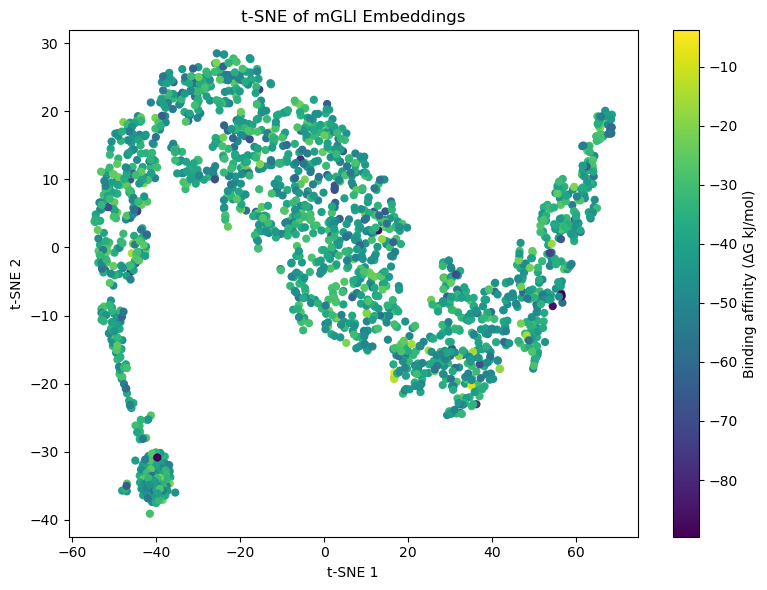

In [13]:
# Cell 6: Display the plot
plt.figure(figsize=(8,6))
sc = plt.scatter(
    X_emb[:,0], X_emb[:,1],
    c=y, cmap="viridis", s=35, edgecolors="none"
)
cbar = plt.colorbar(sc)
cbar.set_label("Binding affinity (ΔG kJ/mol)")
plt.title("t-SNE of mGLI Embeddings")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.tight_layout()
plt.show()

Columns: ['pdb_id', 'delta_g', 'complex_count']
Pearson correlation: -0.088 (p=1.617e-04)
Spearman correlation: -0.113 (p=1.204e-06)


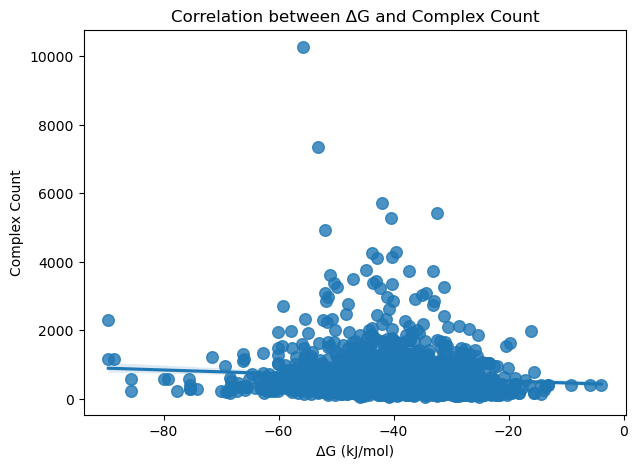

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

# Load TSV (or CSV if comma separated)
data = pd.read_csv("/home/op98/protein_design/topology/mGLI-PP/src/data/data_files/binding_affinity_two_protein_size.tsv", sep=",")

# Standardize column names
data.columns = data.columns.str.strip().str.lower()
print("Columns:", data.columns.tolist())

# Pearson correlation
pearson_corr, pearson_p = pearsonr(data["delta_g"], data["complex_count"])
print(f"Pearson correlation: {pearson_corr:.3f} (p={pearson_p:.3e})")

# Spearman correlation
spearman_corr, spearman_p = spearmanr(data["delta_g"], data["complex_count"])
print(f"Spearman correlation: {spearman_corr:.3f} (p={spearman_p:.3e})")

# Plot
plt.figure(figsize=(7,5))
sns.regplot(x="delta_g", y="complex_count", data=data, ci=95, scatter_kws={"s": 70})
plt.title("Correlation between ΔG and Complex Count")
plt.xlabel("ΔG (kJ/mol)")
plt.ylabel("Complex Count")
plt.show()


In [13]:
# CELL 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Try to get p-values; if SciPy isn't installed, we'll skip p-values gracefully
try:
    from scipy import stats
    SCIPY_OK = True
except Exception:
    SCIPY_OK = False


In [11]:
# CELL 2: Load the table
# EDIT THIS PATH to your file:
path = "/home/op98/protein_design/topology/mGLI-PP/src/data/data_files/binding_affinity_two_protein_size_distance.tsv"

# Auto-detect delimiter (comma vs tab)
with open(path, "r") as f:
    first_line = f.readline()

delimiter = "\t" if ("\t" in first_line and "," not in first_line) else ","

df = pd.read_csv(path, delimiter=delimiter)

# Standardize column names (in case of case differences)
df.columns = [c.strip() for c in df.columns]
df.rename(columns={
    "delta_G": "delta_G",
    "mean_nearest_opposite_A": "mean_nearest_opposite_A"
}, inplace=True)

# Coerce to numeric (invalid -> NaN)
df["delta_G"] = pd.to_numeric(df["delta_G"], errors="coerce")
df["mean_nearest_opposite_A"] = pd.to_numeric(df["mean_nearest_opposite_A"], errors="coerce")

# Keep only rows with both values present
df_clean = df.dropna(subset=["delta_G", "mean_nearest_opposite_A"]).copy()

print(f"Rows in file: {len(df)}, usable rows: {len(df_clean)}")
df_clean[["pdb_id", "delta_G", "mean_nearest_opposite_A"]]


Rows in file: 1831, usable rows: 751


,pdb_id,delta_G,mean_nearest_opposite_A
0,1fc2,-43.65,12.882058
2,2tgp,-32.08,9.317148
3,2ptc,-75.47,8.633217
4,2sni,-66.77,10.043248
5,1atn,-53.35,11.559005
...,...,...,...
1286,2n01,-34.25,8.583091
1322,2mws,-24.81,7.167542
1333,2n1d,-41.22,12.919116
1380,2n8j,-45.49,10.571040


In [14]:
# CELL 3: Correlations (Pearson & Spearman)
x = df_clean["mean_nearest_opposite_A"].values
y = df_clean["delta_G"].values

pearson_r = float(pd.Series(x).corr(pd.Series(y), method="pearson"))
spearman_r = float(pd.Series(x).corr(pd.Series(y), method="spearman"))

if SCIPY_OK and len(df_clean) >= 2:
    pr, p_p = stats.pearsonr(x, y)
    sr, p_s = stats.spearmanr(x, y, nan_policy="omit")
    print(f"Pearson r = {pr:.3f}  (p = {p_p:.3g})")
    print(f"Spearman ρ = {sr:.3f}  (p = {p_s:.3g})")
else:
    print(f"Pearson r = {pearson_r:.3f}  (p-value unavailable; install SciPy)")
    print(f"Spearman ρ = {spearman_r:.3f}  (p-value unavailable; install SciPy)")


Pearson r = -0.019  (p = 0.612)
Spearman ρ = -0.014  (p = 0.695)


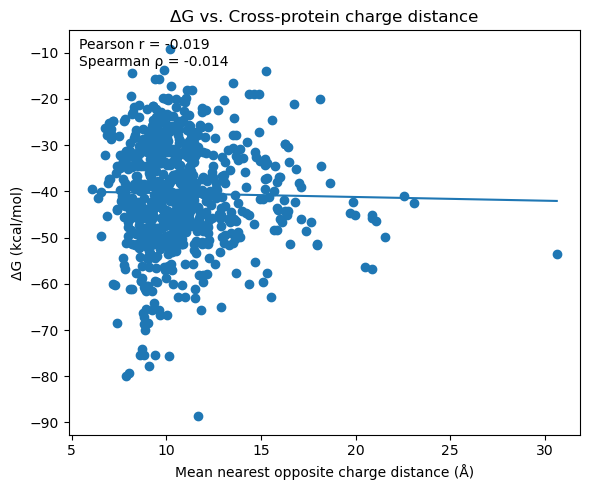

In [15]:
# CELL 4: Scatter + linear fit
plt.figure(figsize=(6, 5))
plt.scatter(df_clean["mean_nearest_opposite_A"], df_clean["delta_G"])
# Simple linear regression for trend line
coef = np.polyfit(df_clean["mean_nearest_opposite_A"], df_clean["delta_G"], 1)
xfit = np.linspace(df_clean["mean_nearest_opposite_A"].min(), df_clean["mean_nearest_opposite_A"].max(), 200)
yfit = np.polyval(coef, xfit)
plt.plot(xfit, yfit)

plt.xlabel("Mean nearest opposite charge distance (Å)")
plt.ylabel("ΔG (kcal/mol)")
plt.title("ΔG vs. Cross-protein charge distance")

# Annotate correlations in the corner
txt = [f"Pearson r = {pearson_r:.3f}", f"Spearman ρ = {spearman_r:.3f}"]
plt.text(0.02, 0.98, "\n".join(txt), transform=plt.gca().transAxes,
         va="top", ha="left")

plt.tight_layout()
plt.show()


,pdb_id,delta_G,complex_count,mean_nearest_opposite_A,mean_nonpolar_to_nonpolar_cross_A,mean_nonpolar_to_charged_cross_A
0,1fc2,-43.65,251,12.882058,7.425219,12.351416
1,3sgb,-61.34,235,NaN,NaN,NaN
2,2tgp,-32.08,281,9.317148,7.257919,8.856553
3,2ptc,-75.47,281,8.633218,7.280448,8.601627
4,2sni,-66.77,339,10.043248,6.839483,10.169143
...,...,...,...,...,...,...
1826,6bx8,-38.24,1113,NaN,NaN,NaN
1827,6dwf,-50.72,2316,NaN,NaN,NaN
1828,6n9d,-61.36,336,NaN,NaN,NaN
1829,6mav,-59.79,335,NaN,NaN,NaN


,delta_G,mean_nearest_opposite_A,mean_nonpolar_to_nonpolar_cross_A,mean_nonpolar_to_charged_cross_A
delta_G,1.000,-0.019,-0.047,0.010
mean_nearest_opposite_A,-0.019,1.000,-0.047,0.502
mean_nonpolar_to_nonpolar_cross_A,-0.047,-0.047,1.000,-0.160
mean_nonpolar_to_charged_cross_A,0.010,0.502,-0.160,1.000


,metric,spearman_rho,p_value,n
0,mean_nearest_opposite_A,-0.0143,0.6953,751
1,mean_nonpolar_to_nonpolar_cross_A,-0.0759,0.0365,760
2,mean_nonpolar_to_charged_cross_A,-0.0119,0.7443,754


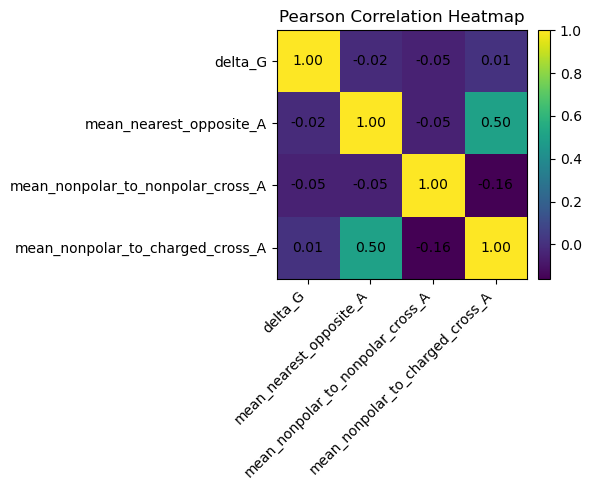

In [1]:
# Correlation analysis & heatmap for ΔG vs distance metrics
# - Auto-detects delimiter (CSV/TSV)
# - Pearson correlation matrix (pairwise complete)
# - Spearman correlations: delta_G vs each distance
# - Matplotlib heatmap (single plot, no seaborn, no custom colors)

import os, io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# ==== INPUT ====
# EITHER: point to your on-disk file (TSV or CSV)
TABLE_PATH = "/home/op98/protein_design/topology/mGLI-PP/src/data/data_files/binding_affinity_two_protein_size_distance.tsv"

# OR paste inline CSV text and set TABLE_PATH=None
CSV_TEXT = None
# CSV_TEXT = """pdb_id,delta_G,complex_count,mean_nearest_opposite_A,mean_nonpolar_to_nonpolar_cross_A,mean_nonpolar_to_charged_cross_A
# 1fc2,-43.65,251,12.882058,7.425219,12.351416
# ... (rest of rows) ...
# """

# ==== LOAD DATA ====
def _read_table_auto(path: str) -> pd.DataFrame:
    with open(path, "r") as f:
        first = f.readline()
    delim = "\t" if ("\t" in first and "," not in first) else ","
    return pd.read_csv(path, delimiter=delim)

if TABLE_PATH:
    df = _read_table_auto(TABLE_PATH)
elif CSV_TEXT:
    df = pd.read_csv(io.StringIO(CSV_TEXT))
else:
    raise ValueError("Provide TABLE_PATH or CSV_TEXT")

# ==== SELECT NUMERIC COLUMNS ====
distance_cols = [
    "mean_nearest_opposite_A",
    "mean_nonpolar_to_nonpolar_cross_A",
    "mean_nonpolar_to_charged_cross_A",
]
cols = ["delta_G"] + [c for c in distance_cols if c in df.columns]
num_df = df[cols].apply(pd.to_numeric, errors="coerce")

# ==== PEARSON CORRELATION MATRIX ====
corr = num_df.corr(method="pearson")  # pairwise NaN handling by pandas

# ==== SPEARMAN: delta_G vs each distance ====
target = "delta_G"
spearman_rows = []
for c in cols:
    if c == target:
        continue
    pair = num_df[[target, c]].dropna()
    if len(pair) > 1:
        rho, p = stats.spearmanr(pair[target], pair[c])
        spearman_rows.append({"metric": c, "spearman_rho": rho, "p_value": p, "n": len(pair)})
    else:
        spearman_rows.append({"metric": c, "spearman_rho": np.nan, "p_value": np.nan, "n": len(pair)})
spearman_df = pd.DataFrame(spearman_rows)

# ==== DISPLAY TABLES (nice in notebooks) ====
display(pd.DataFrame(df))                     # raw data (as read)
display(corr.round(3).rename_axis(index=None, columns=None))   # Pearson matrix
display(spearman_df.round(4))                 # Spearman vs ΔG

# ==== HEATMAP (matplotlib only; single plot; no colors specified) ====
fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(corr.values, aspect='auto')  # default colormap
ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.index)))
ax.set_xticklabels(corr.columns, rotation=45, ha='right')
ax.set_yticklabels(corr.index)
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        val = corr.values[i, j]
        if not np.isnan(val):
            ax.text(j, i, f"{val:.2f}", va='center', ha='center')
ax.set_title("Pearson Correlation Heatmap")
fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
plt.tight_layout()

# Optional: save figure
# out_path = "correlation_heatmap.png"
# plt.savefig(out_path, dpi=200, bbox_inches="tight")
# print("Saved:", os.path.abspath(out_path))


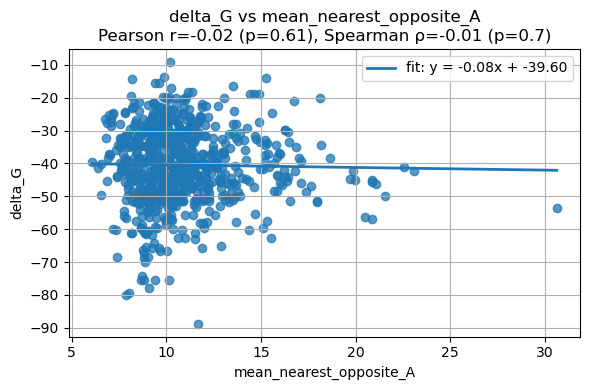

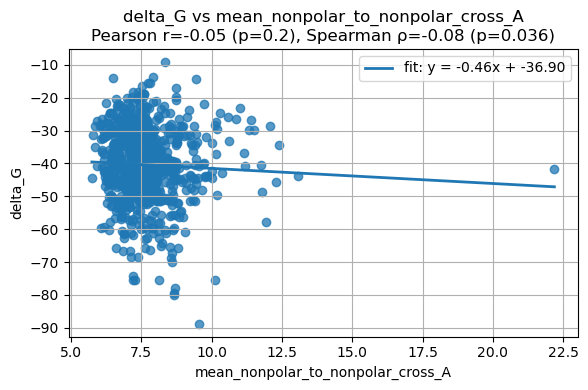

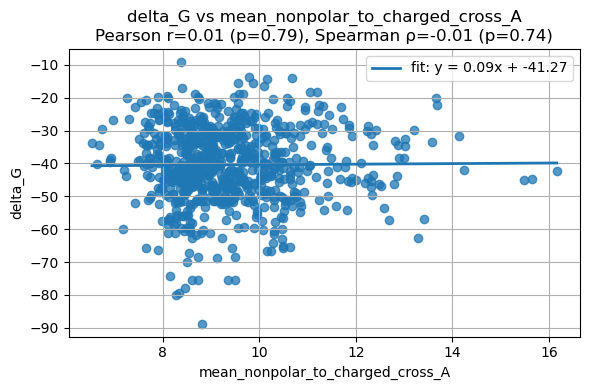

In [2]:
# Scatter plots: delta_G vs each distance metric (standalone cell)

import os, io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# ==== INPUT ====
# Point to your TSV/CSV (auto-detects delimiter)
TABLE_PATH = "/home/op98/protein_design/topology/mGLI-PP/src/data/data_files/binding_affinity_two_protein_size_distance.tsv"

# Or paste inline CSV and set TABLE_PATH=None
CSV_TEXT = None
# CSV_TEXT = """pdb_id,delta_G,complex_count,mean_nearest_opposite_A,mean_nonpolar_to_nonpolar_cross_A,mean_nonpolar_to_charged_cross_A
# 1fc2,-43.65,251,12.882058,7.425219,12.351416
# ... (rest of rows) ...
# """

# ==== LOAD ====
def _read_table_auto(path: str) -> pd.DataFrame:
    with open(path, "r") as f:
        first = f.readline()
    delim = "\t" if ("\t" in first and "," not in first) else ","
    return pd.read_csv(path, delimiter=delim)

if TABLE_PATH:
    df = _read_table_auto(TABLE_PATH)
elif CSV_TEXT:
    df = pd.read_csv(io.StringIO(CSV_TEXT))
else:
    raise ValueError("Provide TABLE_PATH or CSV_TEXT")

# ==== COLUMNS ====
target = "delta_G"
distance_cols = [
    "mean_nearest_opposite_A",
    "mean_nonpolar_to_nonpolar_cross_A",
    "mean_nonpolar_to_charged_cross_A",
]
distance_cols = [c for c in distance_cols if c in df.columns]

# Ensure numeric & drop NaNs pairwise for each plot
for col in distance_cols:
    data = df[[target, col]].apply(pd.to_numeric, errors="coerce").dropna()
    if len(data) < 2:
        print(f"Skipping {col}: not enough data after dropping NaNs.")
        continue

    x = data[col].values
    y = data[target].values

    # Linear regression (least squares)
    slope, intercept, r_val, p_val, _ = stats.linregress(x, y)
    line_x = np.linspace(x.min(), x.max(), 200)
    line_y = slope * line_x + intercept

    # Spearman correlation
    rho, p_s = stats.spearmanr(x, y)

    # Plot (matplotlib only; single plot per metric)
    plt.figure(figsize=(6, 4))
    plt.scatter(x, y, alpha=0.75)
    plt.plot(line_x, line_y, linewidth=2, label=f"fit: y = {slope:.2f}x + {intercept:.2f}")
    plt.xlabel(col)
    plt.ylabel("delta_G")
    plt.title(f"delta_G vs {col}\nPearson r={r_val:.2f} (p={p_val:.2g}), Spearman ρ={rho:.2f} (p={p_s:.2g})")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
